# Contruct the hopping list, coordinate for open boundary condition

Total number of sites: $Lx*Ly + Ly/2$

In [1]:
import numpy as np
from time import time
import random
import matplotlib.pyplot as plt


def hopping_list(Lx, Ly):
    '''
    < Description >
    
    Generate hopping list for Zigzag Graphene NanoRibbon (ZGNR) with OPEN
    boundary condition and SNAKE order.

    < Input >
    Lx : (int) Number of sites on zigzag edges
    Ly : (int) Number of sites along armchair edges (must be divisible by 4)

    < Output >
    hopping_list : (List) contains all possible nearest-neighbor hoppings of 
    ZGNR with open b.c.

    Written by LHA (January 2023)
    '''
    # Total number of sites
    total_sites = Lx * Ly + Ly//2
    
    hop_list = []
    # Consider site orders ranging from 0 to penultimate column (Lx-1)
    # Take Lx = 2 and Ly = 8 for examples:
    # 0 -> (1, 9); 1 -> 2; 2-> 3, 3 -> (4, 10)
    # Except for the top sites (7 and 15), there is no hopping (i, i+1)
    for i in range(Ly*(Lx-1)):
        if i % 4 == 0:
            hop_list.append((i, i+1))
            hop_list.append((i, i+Ly+1))
        elif i % 4 == 1 or i % 4 == 2:
            hop_list.append((i, i+1))
        else:
            hop_list.append((i, i+Ly-1))
            if (i % Ly) != Ly - 1:
                hop_list.append((i, i+1))
    # Consider site orders in the last column (Lx) 
    # It's quite similar to previous case except for the "off_set hopping"
    # The first group of 4 will be off_set by 1, the second is by 3,...
    for i in range(Ly*(Lx-1), Lx*Ly):
        off_set = (i % Ly)//4
        if i % 4 == 0:
            hop_list.append((i, i+1))
            hop_list.append((i, i+Ly+1-(2*off_set+1)))
        elif i % 4 == 1 or i % 4 == 2:
            hop_list.append((i, i+1))
        else:
            hop_list.append((i, i+Ly-1-(2*off_set+1)))
            if (i % Ly) != Ly -1:
                hop_list.append((i, i+1))
    # The rightmost sites, inherently exits due to geometry of open b.c
    for i in range(Lx*Ly, total_sites):
        if i % 2 == 0:
            hop_list.append((i, i+1))
    return hop_list

def coordinate(j, Lx, Ly):
    '''
    < Description >
    Give the Cartesian coordinates of j-th site of an (Lx, Ly) ZGNR with
    open b.c and snake order.

    < Input >
    j : (int) The order of the site
    Lx : (int) Number of sites on zigzag edges
    Ly : (int) Number of sites along armchair edges (must be divisible by 4)

    < Output >
    (x, y) : (tuples) x- and y- coordinates of the j-th site
    '''

    if 0 <= j < Lx*Ly:
        x = j // Ly 
        y = j % Ly 
    # Special treat for rightmost sites 
    else:
        k = (j - Lx*Ly)//2
        x = j // Ly
        y = 4 * k + 1 + (j-Lx*Ly)%2
    # Example: y = 1, 5, ...
    if y % 2 == 1 and ((y + 1)/2) % 2 == 1:
        return (x, (y/2) * np.sqrt(3)/2 + 1/(2*np.sqrt(3)))
    # Example: y = 3, 7, ...
    if y % 2 == 1 and ((y + 1)/2) % 2 == 0:
        return (x + 1/2, (y/2) * np.sqrt(3)/2 + 1/(2*np.sqrt(3)))
    # Example: y = 2, 6, ...
    if y % 2 == 0 and (y/2) % 2 == 1:
        return (x, ((y + 1)/2) * np.sqrt(3)/2)
    # Example: y = 0, 4, ...
    if y % 2 == 0 and (y/2) % 2 == 0:
        return (x + 1/2, ((y + 1)/2) * np.sqrt(3)/2)
    

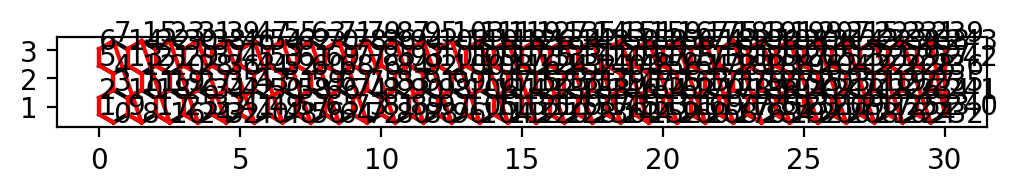

In [3]:
fig = plt.figure(dpi=200)
ax = fig.gca()

Lx = 30
Ly = 8

for i in range(Lx*Ly+Ly//2):
    x, y = coordinate(i, Lx, Ly)
    # ax.scatter(x, y, color = 'k')
    ax.text(x, y, str(i))

for i in hopping_list(Lx, Ly):
    x1, y1 = coordinate(i[0], Lx, Ly)
    x2, y2 = coordinate(i[1], Lx, Ly)
    ax.plot((x1, x2), (y1, y2), color = 'k')


for i in range(Lx*Ly+Ly//2-1):
    x1, y1 = coordinate(i, Lx, Ly)
    x2, y2 = coordinate(i+1, Lx, Ly)
    ax.plot([x1, x2], [y1, y2], color = 'r', linestyle = '-')

ax.set_aspect(1)
plt.show()

In [11]:
np.savetxt("hopping_list.txt", hopping_list(2, 8), fmt='%i')

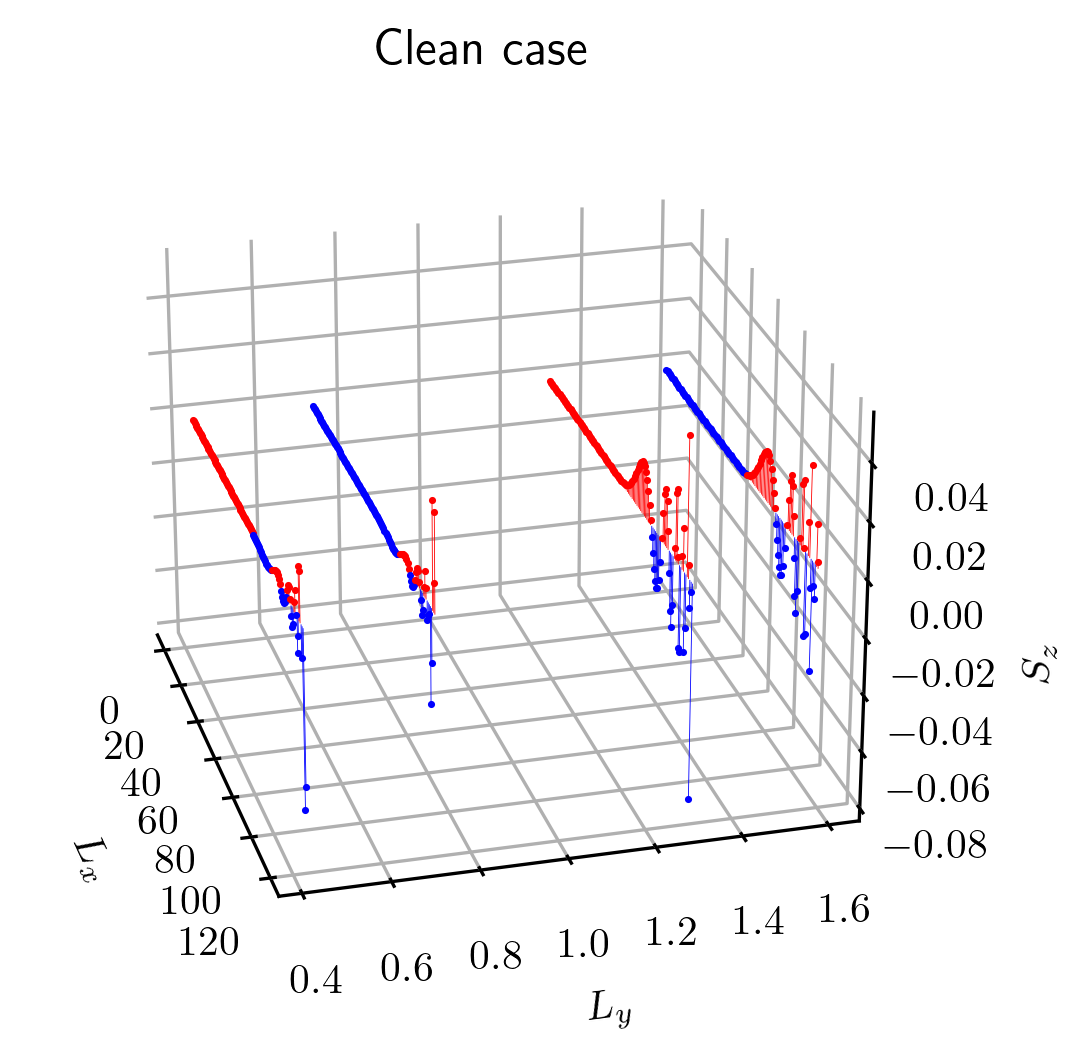

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({'text.usetex': True})

def color(z):
    if z>=0:
        return 'r'
    else:
        return 'b'

##### Clean
fig= plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1, projection="3d")

ax.set_xlabel("$L_x$")
ax.set_ylabel("$L_y$")
ax.set_zlabel("$S_z$")
ax.set_title(r"Clean case")


Lx = 120
Ly = 4
dope = 12

# quantity_clean = np.loadtxt('sz_dope0_U1_gamma0_L8W4.txt')
# quantity_clean = np.loadtxt('0sz_30_8_clean_10sweeps.txt')
quantity_clean = np.loadtxt('./sz_L120W4_dope12_clean.txt')
# quantity_clean = np.loadtxt('./ntot_L120W4_dope12_clean.txt')







for i in range(len(quantity_clean)):
    coor = coordinate(i, Lx, Ly)
    ax.scatter(*coor, quantity_clean[i], color=color(quantity_clean[i]), s=0.5)
    ax.plot([coor[0], coor[0]], [coor[1], coor[1]], [0, quantity_clean[i]] , color=color(quantity_clean[i]), linewidth = 0.2)
    
# for i in hopping_list(Lx, Ly):
#     x1, y1 = coordinate(i[0], Lx, Ly)
#     x2, y2 = coordinate(i[1], Lx, Ly)
#     ax.plot((x1, x2), (y1, y2), (0, 0), color = 'k')
    
    
    
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


    
ax.view_init(elev=25., azim=-15)


# plt.savefig("dmrg_sz.pdf", bbox_inches='tight')

# ax.set_title("Half-filling, disorder, 30 by 8, $\Gamma =0.5 t, \; U = t$")

plt.show()

In [7]:
np.sum(quantity_clean) - Lx*Ly - Ly//2 - dope


-1.3642420526593924e-12

In [1]:
for i in range(10, 1, -1):
    print(i)
    

10
9
8
7
6
5
4
3
2
